In [3]:
import collections
import random

buffer = collections.deque(maxlen=10)
for i in range(10):
  buffer.append((1, 2, 3, 4))
print(buffer)

a, b, c, d = zip(*buffer)
print(zip(*buffer))
print(a)
print(b)
print(c)
print(d)

deque([(1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4), (1, 2, 3, 4)], maxlen=10)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
(3, 3, 3, 3, 3, 3, 3, 3, 3, 3)
(4, 4, 4, 4, 4, 4, 4, 4, 4, 4)


In [1]:
import gymnasium as gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

import DQN
import rl_utils

lr = 2e-3
num_episodes = 500
hidden_dim = 128
gamma = 0.98
epsilon = 0.01
target_update = 10
buffer_size = 10000
minimal_size = 500
batch_size = 64
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(f'device: {device}')

env_name = 'CartPole-v0'
env = gym.make(env_name)
# env.seed(0)
torch.manual_seed(0)
replay_buffer = rl_utils.ReplayBuffer(buffer_size)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = DQN.DQN(state_dim, hidden_dim, action_dim, lr, gamma, epsilon,
                target_update, device)

return_list = rl_utils.train_off_policy_agent(env, agent, num_episodes, 
                                              replay_buffer, minimal_size, batch_size)

device: cuda


/root/miniconda3/lib/python3.12/site-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
Iteration 0:   0%|          | 0/50 [00:00<?, ?it/s]/root/autodl-tmp/code/python/learn_dqn/DQN.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 9: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s, episode=500, return=198.900]


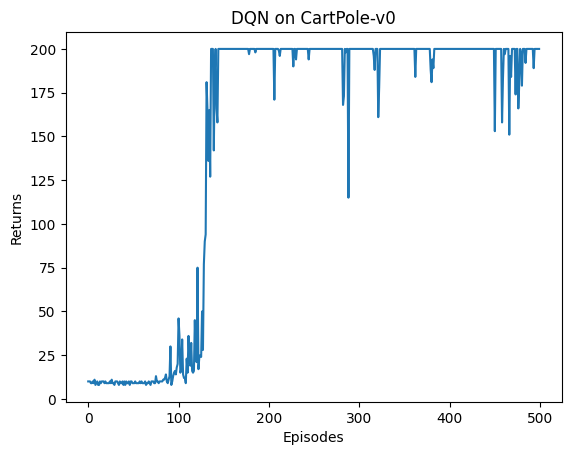

In [2]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(f'DQN on {env_name}')
plt.show()